In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.mode.chained_assignment = None  # default='warn'

<font size = '3'> Assigning the parsed data into dataframes.</font>

In [2]:
housing_data_gda = pd.read_excel('files/housing_data_flats_gdansk.xlsx')
housing_data_ktw = pd.read_excel('files/housing_data_flats_katowice.xlsx')
housing_data_krk = pd.read_excel('files/housing_data_flats_krakow.xlsx')
housing_data_ldz = pd.read_excel('files/housing_data_flats_lodz.xlsx')
housing_data_poz = pd.read_excel('files/housing_data_flats_poznan.xlsx')
housing_data_szc = pd.read_excel('files/housing_data_flats_szczecin.xlsx')
housing_data_waw = pd.read_excel('files/housing_data_flats_warszawa.xlsx')
housing_data_wro = pd.read_excel('files/housing_data_flats_wroclaw.xlsx')

print(housing_data_gda.head())

   total_price_pln  price_per_sqm_pln  amt_of_rooms  size_in_sqm   
0           549000              14447             2        38.00  \
1           699000              11184             3        62.50   
2          1245000              10623             4       117.20   
3           372500              10582             2        35.20   
4           317300              11488             1        27.62   

                                                 loc               area  
0  ul. Jagiellońska 26 E, Przymorze Wielkie, Gdań...  Przymorze Wielkie  
1       ul. Jabłoniowa 17, Jasień, Gdańsk, pomorskie             Jasień  
2         ul. Łąkowa, Śródmieście, Gdańsk, pomorskie        Śródmieście  
3             Ujeścisko-Łostowice, Gdańsk, pomorskie             Gdańsk  
4             Ujeścisko-Łostowice, Gdańsk, pomorskie             Gdańsk  


<font size='3'>**Exploring outliers in the data.**</font>
- <small>explores **price per sqm** outliers on the higher end and the lower end.</small>
- <small>First off, creates a df by for outliers by calculating zscores.</small>
- <small>In the end, visualizes outliers in two bar charts.</small>

  city     highs    lows  high_count  low_count
6  waw  48674.54     NaN         619          0
7  wro  25396.66     NaN         262          0
0  gda  25643.59     NaN         261          0
1  ktw  19506.09     NaN         220          0
2  krk  27605.23     NaN         213          0
3  ldz  15656.71     NaN         144          0
5  szc  15705.91     NaN          67          0
4  poz  18228.16  5707.0          32          2


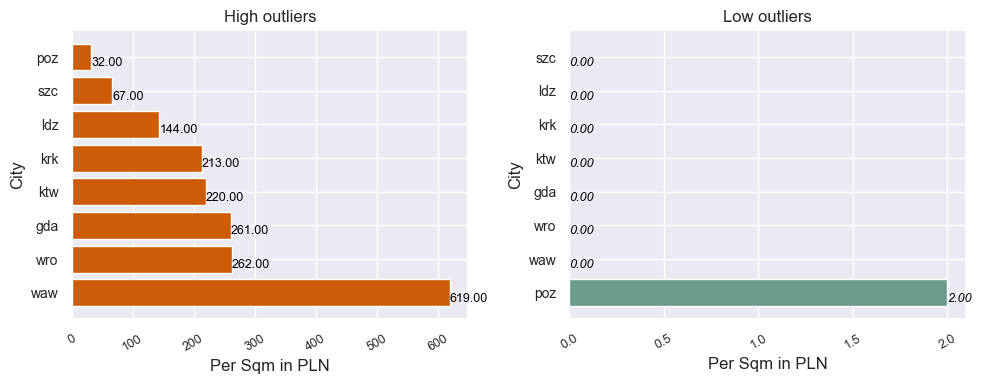

In [9]:
db_list = [housing_data_gda, housing_data_ktw, housing_data_krk, housing_data_ldz, housing_data_poz, housing_data_szc, housing_data_waw, housing_data_wro]
db_list_string = ['gda', 'ktw', 'krk', 'ldz', 'poz', 'szc', 'waw', 'wro'] # strings created manually as we can't dynamically crete strings from var names

outliers_dict = {}
outlier_high_list = []
outlier_low_list = []
outlier_len_low_list = []
outlier_len_high_list = []

threshold = 2.8

for db in db_list:
    z_scores = stats.zscore(db['price_per_sqm_pln'])
    outliers_high = z_scores > threshold
    outliers_low = z_scores < -threshold
    
    outlier_high_mean = round(db['price_per_sqm_pln'][outliers_high].mean(), 2)
    outlier_low_mean = round(db['price_per_sqm_pln'][outliers_low].mean(), 2)
    
    outlier_high_list.append(outlier_high_mean)
    outlier_low_list.append(outlier_low_mean)

    outlier_len_high_list.append(len(db['price_per_sqm_pln'][outliers_high]))
    outlier_len_low_list.append(len(db['price_per_sqm_pln'][outliers_low]))
    

outliers_dict = {
    'city': db_list_string,
    'highs': outlier_high_list,
    'lows': outlier_low_list,
    'high_count': outlier_len_high_list,
    'low_count': outlier_len_low_list
}
    
outliers_df = pd.DataFrame.from_dict(outliers_dict)

outliers_df = outliers_df.sort_values(ascending=False, by='high_count')

print(outliers_df)

plotting_param_1 = 'high_count'
plotting_param_2 = 'low_count'

plt.figure(figsize=(10, 4))
sns.set_theme(style='darkgrid')

outliers_df = outliers_df.sort_values(ascending=False, by=plotting_param_1)

plt.subplot(1, 2, 1) # number of rows, number of columns, position
plt.barh(outliers_df['city'], outliers_df[plotting_param_1], color='#CD5C08', aa=True)
plt.title('High outliers')
plt.xlabel('Per Sqm in PLN')
plt.ylabel('City')
plt.xticks(fontsize=9, rotation=30)  # increase x font
plt.yticks(fontsize=10)
plt.grid(True)

for index, value in enumerate(outliers_df[plotting_param_1]):
    plt.text(value, index, f'{value:.2f}', ha='left', va='top', fontsize=9, color='black')

outliers_df = outliers_df.sort_values(ascending=False, by=plotting_param_2) # sorting once again after the plotting of the first one allows you to sort the second one separately

plt.subplot(1, 2, 2) # number of rows, number of columns, position
plt.barh(outliers_df['city'], outliers_df[plotting_param_2], color='#6A9C89', aa=True)
plt.title('Low outliers')
plt.xlabel('Per Sqm in PLN')
plt.ylabel('City')
plt.xticks(fontsize=9, rotation=30)  # increase x font
plt.yticks(fontsize=10)
plt.grid(True)

for index, value in enumerate(outliers_df[plotting_param_2]):
    plt.text(value, index, f'{value:.2f}', ha='left', va='top', fontsize=9, color='black', fontstyle='italic')

    
plt.tight_layout()
plt.show()

<font size='3'>**Below explores the price distribution frequency.**</font>

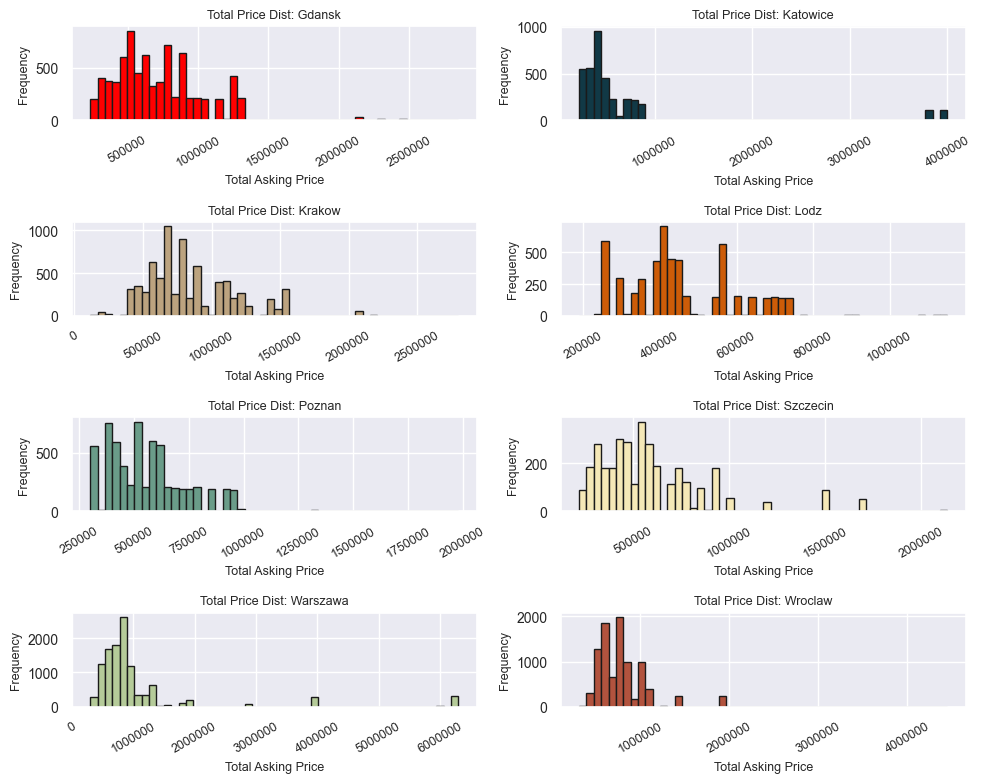

In [4]:
plt.figure(figsize=(10, 8))

plt.subplot(4, 2, 1) # number of rows, number of columns, position
plt.hist(housing_data_gda['total_price_pln'], bins=50, edgecolor='k', color='red')
plt.title('Total Price Dist: Gdansk', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 2) # number of rows, number of columns, position
plt.hist(housing_data_ktw['total_price_pln'], bins=50, edgecolor='k', color='#113946')
plt.title('Total Price Dist: Katowice', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 3) # number of rows, number of columns, position
plt.hist(housing_data_krk['total_price_pln'], bins=50, edgecolor='k', color='#BCA37F')
plt.title('Total Price Dist: Krakow', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 4) # number of rows, number of columns, position
plt.hist(housing_data_ldz['total_price_pln'], bins=50, edgecolor='k', color='#CD5C08')
plt.title('Total Price Dist: Lodz', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30) 
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 5) # number of rows, number of columns, position
plt.hist(housing_data_poz['total_price_pln'], bins=50, edgecolor='k', color='#6A9C89')
plt.title('Total Price Dist: Poznan', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 6) # number of rows, number of columns, position
plt.hist(housing_data_szc['total_price_pln'], bins=50, edgecolor='k', color='#F5E8B7')
plt.title('Total Price Dist: Szczecin', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 7) # number of rows, number of columns, position
plt.hist(housing_data_waw['total_price_pln'], bins=50, edgecolor='k', color='#B5CB99')
plt.title('Total Price Dist: Warszawa', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30)  
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

plt.subplot(4, 2, 8) # number of rows, number of columns, position
plt.hist(housing_data_wro['total_price_pln'], bins=50, edgecolor='k', color='#B2533E')
plt.title('Total Price Dist: Wroclaw', fontsize=9)
plt.xlabel('Total Asking Price', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(fontsize=9, rotation=30) 
plt.yticks(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain')

sns.set_theme(style='dark')
plt.tight_layout()
plt.show()

**Below explores for the top areas by asking price.**

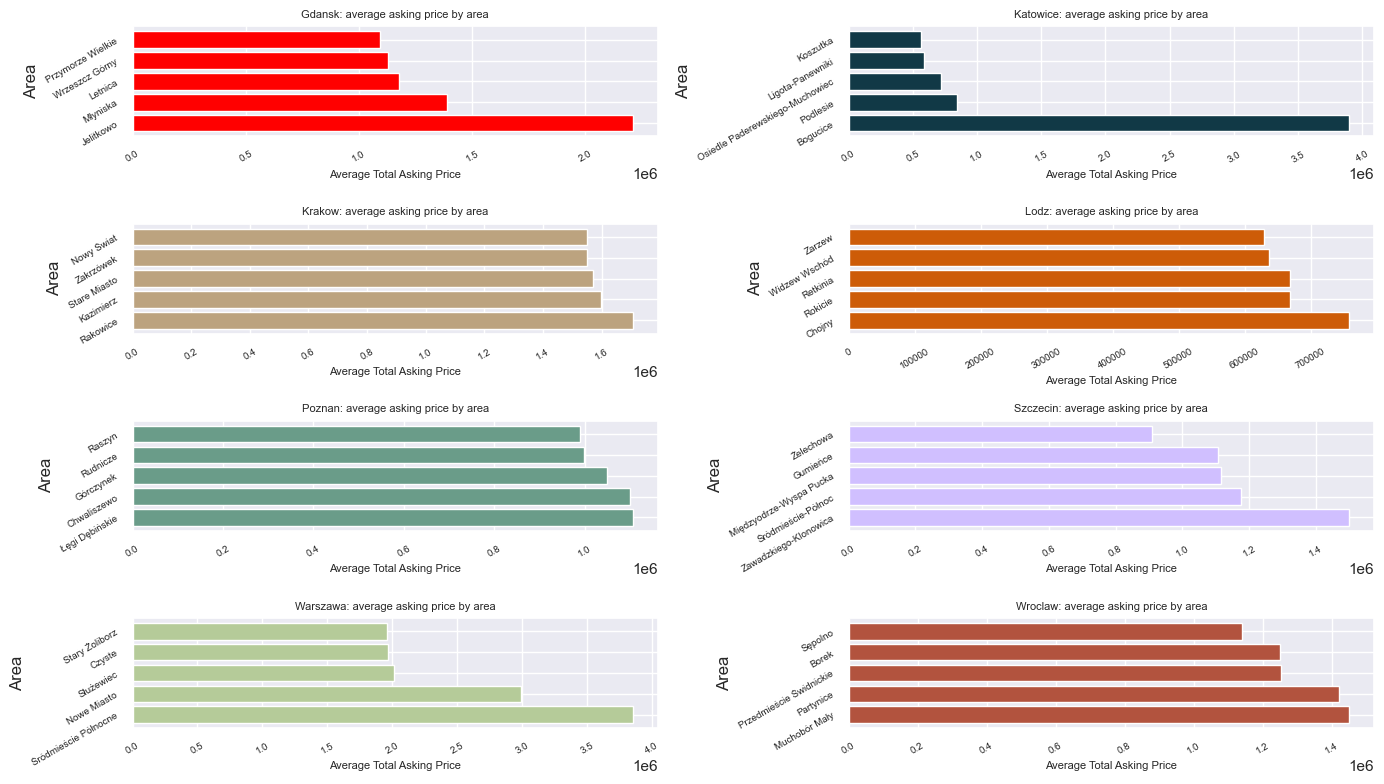

In [5]:
prices_list_area = []
prices_list_price = []

plt.figure(figsize=(14, 8))
sns.set_theme()

average_prices_by_area = round(housing_data_gda.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 1) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='red')
plt.title('Gdansk: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30) 
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_ktw.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 2) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#113946')
plt.title('Katowice: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_krk.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 3) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#BCA37F')
plt.title('Krakow: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_ldz.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 4) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#CD5C08')
plt.title('Lodz: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_poz.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 5) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#6A9C89')
plt.title('Poznan: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_szc.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 6) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#D0BFFF')
plt.title('Szczecin: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_waw.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 7) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#B5CB99')
plt.title('Warszawa: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

average_prices_by_area = round(housing_data_wro.groupby('area').agg({'total_price_pln': 'mean', 'price_per_sqm_pln': 'mean'}).reset_index(), 2)
average_prices_by_area_sorted_by_total_price = average_prices_by_area.sort_values(ascending=False, by='total_price_pln')

plt.subplot(4, 2, 8) # number of rows, number of columns, position
plt.barh(average_prices_by_area_sorted_by_total_price.head()['area'], average_prices_by_area_sorted_by_total_price.head()['total_price_pln'], color='#B2533E')
plt.title('Wroclaw: average asking price by area', fontsize=8)
plt.xlabel('Average Total Asking Price', fontsize=8)
plt.ylabel('Area')
plt.xticks(fontsize=7, rotation=30)  
plt.yticks(fontsize=7, rotation=30)
plt.grid(True)

plt.tight_layout()
plt.show()

**Below explores the correlation between different rows.**

Correlation Matrices


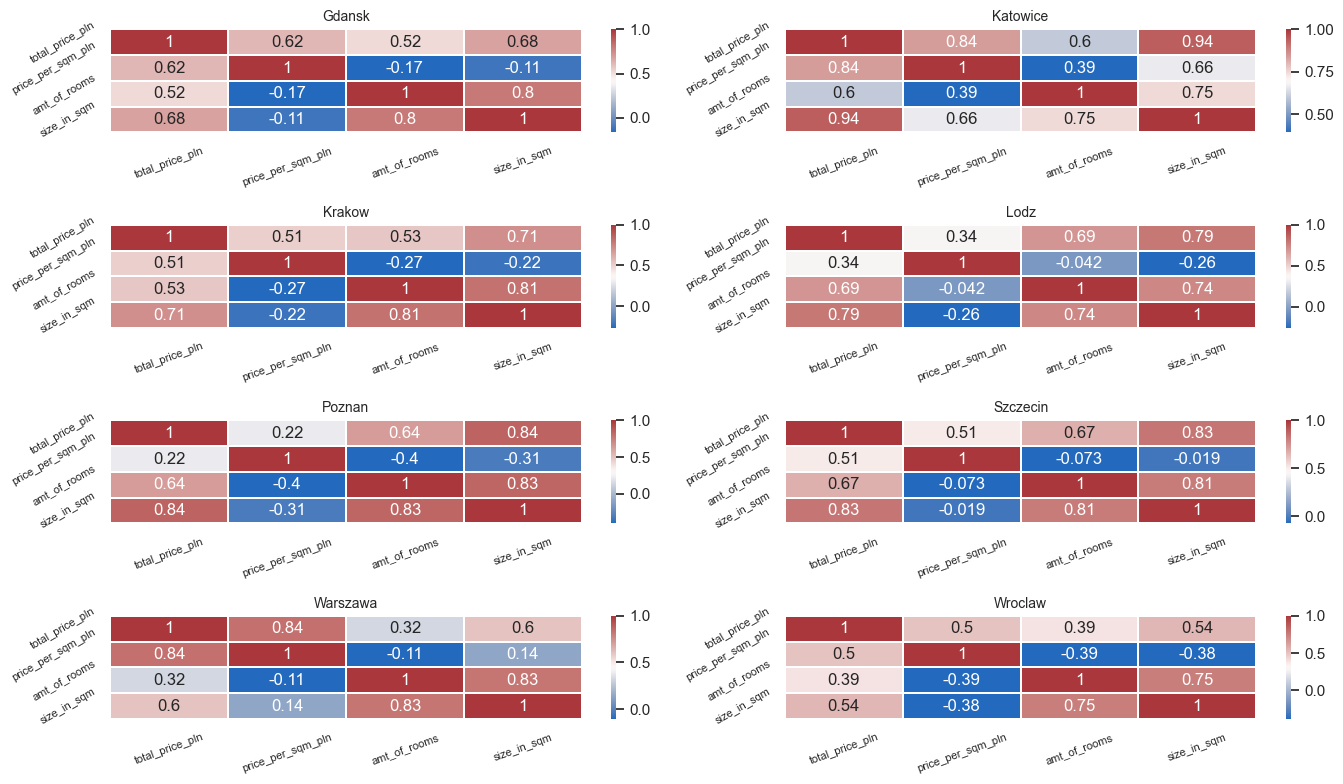

In [6]:
plt.figure(figsize=(14, 8))
sns.set_theme()

correlation_matrix = housing_data_gda.corr(numeric_only=True)

plt.subplot(4, 2, 1)
plt.title('Gdansk', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_ktw.corr(numeric_only=True)

plt.subplot(4, 2, 2)
plt.title('Katowice', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)


correlation_matrix = housing_data_krk.corr(numeric_only=True)

plt.subplot(4, 2, 3)
plt.title('Krakow', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_ldz.corr(numeric_only=True)

plt.subplot(4, 2, 4)
plt.title('Lodz', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_poz.corr(numeric_only=True)

plt.subplot(4, 2, 5)
plt.title('Poznan', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_szc.corr(numeric_only=True)

plt.subplot(4, 2, 6)
plt.title('Szczecin', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_waw.corr(numeric_only=True)

plt.subplot(4, 2, 7)
plt.title('Warszawa', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

correlation_matrix = housing_data_wro.corr(numeric_only=True)

plt.subplot(4, 2, 8)
plt.title('Wroclaw', fontsize=10)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), linewidths=0.05, linecolor='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=20, fontsize=8)

print('Correlation Matrices')
plt.tight_layout()
plt.show()